In [2]:
import zipfile
import os

# Path to your downloaded zip file
zip_path = r"C:/Users/user/Downloads/P_Data_Extract_From_World_Development_Indicators.zip"   

# Folder where we'll extract the contents
extract_folder = r"C:/Users/user/Downloads/wb_data"

# Create the folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Files extracted to: {extract_folder}")

Files extracted to: C:/Users/user/Downloads/wb_data


In [3]:
# List all files in the extract folder
extracted_files = os.listdir(extract_folder)
print("Files in the extracted folder:")
for f in extracted_files:
    print(" -", f)

Files in the extracted folder:
 - f82c9965-bdfa-44a0-9ddb-3de7f606e0a5_Data.csv
 - f82c9965-bdfa-44a0-9ddb-3de7f606e0a5_Series - Metadata.csv


In [4]:
import pandas as pd
import os

extract_folder = r"C:/Users/user/Downloads/wb_data"   
data_file = os.path.join(extract_folder, "f82c9965-bdfa-44a0-9ddb-3de7f606e0a5_Data.csv")

# Load the data
df = pd.read_csv(data_file)

# Quick peek
df.head()

,Country Name,Country Code,Series Name,Series Code,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.202132,3.961989,6.069871,5.094195,-0.125812,7.528226,...,-3.545763,-3.275917,1.322869,1.783667,1.220778,-3.276759,4.762604,3.016694,3.241655,3.419315
1,Brazil,BRA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,10.551000,9.692000,9.280000,8.268000,9.419000,8.420000,...,8.538000,11.580000,12.792000,12.329000,11.936000,13.697000,13.158000,9.231000,7.947000,6.801000
2,Brazil,BRA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,6.869537,4.183568,3.641273,5.678594,4.888035,5.038727,...,9.029901,8.739144,3.446373,3.664850,3.732976,3.211768,8.301660,9.280106,4.593563,4.367464
3,Brazil,BRA,Trade (% of GDP),NE.TRD.GNFS.ZS,27.086795,26.041700,25.292611,27.257569,22.105976,22.772178,...,26.953626,24.533682,24.319734,28.876203,28.890258,32.302079,37.656331,38.816066,33.666230,35.584524
4,Canada,CAN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.210454,2.637944,2.049905,0.995406,-2.915086,3.090806,...,0.649971,1.038551,3.033835,2.742963,1.908432,-5.038233,5.950528,4.189036,1.528746,1.554795


In [5]:
year_columns = []
for col in df.columns:
    # Check if column name starts with a 4-digit year
    if col[:4].isdigit():
        year = int(col[:4])
        if 2005 <= year <= 2024:
            year_columns.append(col)

print("Year columns found:", year_columns)
print("Number of year columns:", len(year_columns))

Year columns found: ['2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']
Number of year columns: 20


In [6]:
id_cols = ['Country Name', 'Country Code', 'Series Name', 'Series Code']

df_long = pd.melt(
    df,
    id_vars=id_cols,
    value_vars=year_columns,
    var_name='Year_original',
    value_name='Value'
)

# Extract the numeric year from strings like '2005 [YR2005]'
df_long['Year'] = df_long['Year_original'].str[:4].astype(int)

# Drop the original messy year column
df_long.drop('Year_original', axis=1, inplace=True)

print("Melted. New shape:", df_long.shape)
df_long.head()

Melted. New shape: (1060, 6)


,Country Name,Country Code,Series Name,Series Code,Value,Year
0,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.202132,2005
1,Brazil,BRA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,10.551000,2005
2,Brazil,BRA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,6.869537,2005
3,Brazil,BRA,Trade (% of GDP),NE.TRD.GNFS.ZS,27.086795,2005
4,Canada,CAN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.210454,2005


In [7]:
target_countries = [
    'United States', 'Canada', 'United Kingdom', 'Germany', 'France', 'Italy', 'Japan',
    'Brazil', 'Russian Federation', 'India', 'China', 'South Africa'
]

df_filtered = df_long[df_long['Country Name'].isin(target_countries)]

print("Filtered by country. Unique countries:")
print(df_filtered['Country Name'].unique())
print("Shape:", df_filtered.shape)

Filtered by country. Unique countries:
['Brazil' 'Canada' 'China' 'France' 'Germany' 'India' 'Italy' 'Japan'
 'South Africa' 'United Kingdom' 'United States' 'Russian Federation']
Shape: (960, 6)


In [8]:
print("Unique series names in filtered data:")
print(df_filtered['Series Name'].unique())

Unique series names in filtered data:
['GDP growth (annual %)'
 'Unemployment, total (% of total labor force) (modeled ILO estimate)'
 'Inflation, consumer prices (annual %)' 'Trade (% of GDP)']


In [9]:
# Based on the output from Cell 5, create a dictionary that maps the exact Series Name to a short name.
# Adjust the keys to match what you saw. For example:

indicator_mapping = {
    'GDP growth (annual %)': 'GDP_growth',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Trade (% of GDP)': 'Trade_Openness'
}

# Add a new column with short names
df_filtered['Indicator_short'] = df_filtered['Series Name'].map(indicator_mapping)

# Keep only rows where the mapping succeeded (i.e., rows that are one of our four indicators)
df_filtered = df_filtered.dropna(subset=['Indicator_short'])

print("After filtering to four indicators. Remaining rows:", len(df_filtered))
print("Unique short indicators:", df_filtered['Indicator_short'].unique())

After filtering to four indicators. Remaining rows: 960
Unique short indicators: ['GDP_growth' 'Unemployment' 'Inflation' 'Trade_Openness']


C:\Users\user\AppData\Local\Temp\ipykernel_63852\1256576574.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Indicator_short'] = df_filtered['Series Name'].map(indicator_mapping)


In [10]:
df_pivoted = df_filtered.pivot_table(
    index=['Country Name', 'Year'],
    columns='Indicator_short',
    values='Value'
).reset_index()

# Remove the column name 'Indicator_short' for cleaner look
df_pivoted.columns.name = None

print("Pivoted. Shape:", df_pivoted.shape)
df_pivoted.head()

Pivoted. Shape: (240, 6)


,Country Name,Year,GDP_growth,Inflation,Trade_Openness,Unemployment
0,Brazil,2005,3.202132,6.869537,27.086795,10.551
1,Brazil,2006,3.961989,4.183568,26.041700,9.692
2,Brazil,2007,6.069871,3.641273,25.292611,9.280
3,Brazil,2008,5.094195,5.678594,27.257569,8.268
4,Brazil,2009,-0.125812,4.888035,22.105976,9.419


In [11]:
# Drop rows where GDP_growth or Unemployment is missing (critical for analysis)
df_clean = df_pivoted.dropna(subset=['GDP_growth', 'Unemployment'])

print(f"Rows before: {len(df_pivoted)}, after dropping missing critical values: {len(df_clean)}")

Rows before: 240, after dropping missing critical values: 240


In [12]:
output_path = r"C:/Users/user/Downloads/master_economics.csv"
df_clean.to_csv(output_path, index=False)
print(f"Saved master CSV to: {output_path}")

Saved master CSV to: C:/Users/user/Downloads/master_economics.csv


In [13]:
#  Load the cleaned data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv(r"C:/Users/user/Downloads/master_economics.csv")

# Quick check
print(df.head())
print(df.info())

  Country Name  Year  GDP_growth  Inflation  Trade_Openness  Unemployment
0       Brazil  2005    3.202132   6.869537       27.086795        10.551
1       Brazil  2006    3.961989   4.183568       26.041700         9.692
2       Brazil  2007    6.069871   3.641273       25.292611         9.280
3       Brazil  2008    5.094195   5.678594       27.257569         8.268
4       Brazil  2009   -0.125812   4.888035       22.105976         9.419
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    240 non-null    object 
 1   Year            240 non-null    int64  
 2   GDP_growth      240 non-null    float64
 3   Inflation       240 non-null    float64
 4   Trade_Openness  240 non-null    float64
 5   Unemployment    240 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 11.4+ KB
None


Why: We reload the data to start fresh. info() shows data types and missing values.

In [14]:
# Compute correlation matrix

# Select only the numeric columns (indicators)
numeric_cols = ['GDP_growth', 'Unemployment', 'Inflation', 'Trade_Openness']
corr_matrix = df[numeric_cols].corr()

print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                GDP_growth  Unemployment  Inflation  Trade_Openness
GDP_growth        1.000000     -0.120038   0.209812       -0.041903
Unemployment     -0.120038      1.000000   0.175629        0.116368
Inflation         0.209812      0.175629   1.000000       -0.048054
Trade_Openness   -0.041903      0.116368  -0.048054        1.000000


Why: Correlation tells us how two variables move together (‑1 to +1). 
This is the foundation for understanding relationships like Okun’s Law (negative GDP‑unemployment correlation).

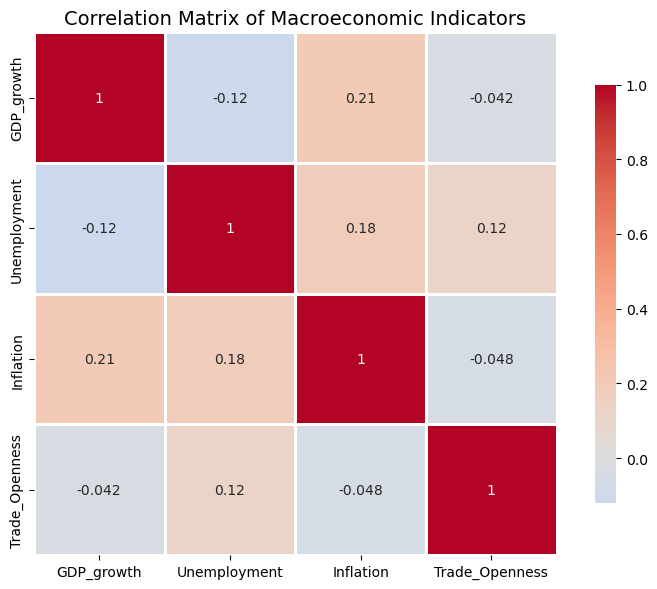

In [15]:
# Visualise with a heatmap

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, 
            annot=True,           # show correlation values
            cmap='coolwarm',       # intuitive color scale
            center=0,              # white at zero
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Macroeconomic Indicators', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)  # save for later use
plt.show()

Why: A heatmap makes patterns instantly visible

In [16]:
# Save correlation matrix for Tableau

# Reset index to turn it into a table with row names
corr_reset = corr_matrix.reset_index().rename(columns={'index': 'Indicator'})
corr_reset.to_csv('correlation_matrix.csv', index=False)
print("Saved correlation_matrix.csv")

Saved correlation_matrix.csv


Why: Tableau doesn't compute correlations on the fly easily. By pre‑computing, you can display it as a custom table or highlight matrix.

In [17]:
# Multiple linear regression – predicting Inflation
# We'll use statsmodels because it gives nice summary tables with p‑values and R².

import statsmodels.api as sm

# Drop rows with missing values in any of the predictors or target
df_reg = df.dropna(subset=['GDP_growth', 'Unemployment', 'Trade_Openness', 'Inflation'])

# Define predictors (X) and target (y)
X = df_reg[['GDP_growth', 'Unemployment', 'Trade_Openness']]
y = df_reg['Inflation']

# Add a constant term (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     7.669
Date:                Fri, 13 Feb 2026   Prob (F-statistic):           6.52e-05
Time:                        17:16:00   Log-Likelihood:                -591.76
No. Observations:                 240   AIC:                             1192.
Df Residuals:                     236   BIC:                             1205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7713      0.679      4.

Why: This estimates how much GDP growth, unemployment, and trade openness influence inflation. 
The coefficients tell you the direction and magnitude. The p‑values show statistical significance.

In [18]:
# Extract coefficients for Tableau

# Create a DataFrame of coefficients
coeff_df = pd.DataFrame({
    'Feature': ['Intercept'] + ['GDP_growth', 'Unemployment', 'Trade_Openness'],
    'Coefficient': model.params.values,
    'P>|t|': model.pvalues.values
})
coeff_df.to_csv('regression_coefficients.csv', index=False)
print("Saved regression_coefficients.csv")

Saved regression_coefficients.csv


Why: You can display these numbers in your dashboard to add analytical depth.

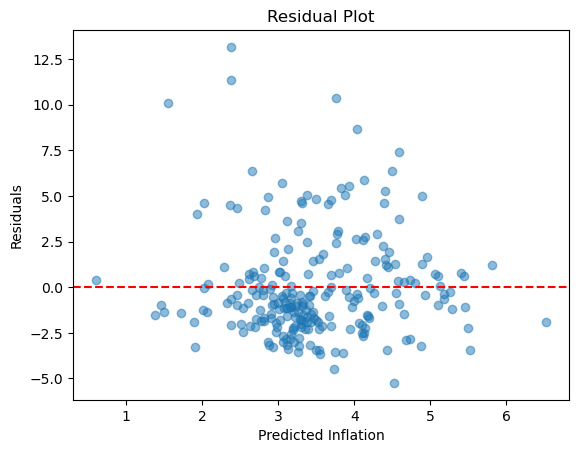

In [19]:
# Residual plot

predictions = model.predict(X)
residuals = y - predictions

plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Inflation')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig('residual_plot.png', dpi=300)
plt.show()

Why: Checks if the model assumptions hold (residuals should be randomly scattered around zero).

In [20]:
import pandas as pd
corr_check = pd.read_csv('correlation_matrix.csv')
print(corr_check.head())

        Indicator  GDP_growth  Unemployment  Inflation  Trade_Openness
0      GDP_growth    1.000000     -0.120038   0.209812       -0.041903
1    Unemployment   -0.120038      1.000000   0.175629        0.116368
2       Inflation    0.209812      0.175629   1.000000       -0.048054
3  Trade_Openness   -0.041903      0.116368  -0.048054        1.000000


In [21]:
# Assuming corr_matrix is your 4x4 correlation matrix
# Reset index to bring indicator names into a column
corr_reset = corr_matrix.reset_index().rename(columns={'index': 'Indicator1'})

# Melt the DataFrame to long format
corr_long = pd.melt(
    corr_reset,
    id_vars=['Indicator1'],
    var_name='Indicator2',
    value_name='Correlation'
)

# Optional: remove self-correlations (diagonal) if you want
corr_long = corr_long[corr_long['Indicator1'] != corr_long['Indicator2']]

# Save
corr_long.to_csv('correlation_long.csv', index=False)
print("Saved correlation_long.csv")

Saved correlation_long.csv


Why:
pd.melt transforms the wide matrix into three columns.
This long format is perfect for Tableau’s highlight table: you put Indicator1 on Rows, Indicator2 on Columns, and Correlation on Color/Label.